In [353]:
pip install xgboost 

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/45/6d/8c1d2570a52db6263d855c3ee3daf8f4bdf4a365cd6610772d6fce5fd904/xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.4 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [354]:
from bs4 import BeautifulSoup
from datetime import time
from datetime import datetime
from datetime import timedelta
from collections import Counter
import json
import requests
import csv
import pandas as pd
import numpy as np
import aiohttp
import asyncio
import concurrent.futures
import io
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_hist_gradient_boosting  # Enable experimental module
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import plot_importance

In [4]:
Crossfit_Men = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/Analysis_Data/Crossfit_Men.csv')
Crossfit_Men.head()

/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_1135/1936657856.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Crossfit_Men = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/Analysis_Data/Crossfit_Men.csv')


,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),Overall Rank,...,Grace (time),Grace (sec),Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec)
0,10942,M,Everett Sloan,Canada,North America East,CrossFit Bytown,67.0,45.0,200.0,68985.0,...,1:47,107.0,7:13,433.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10926,M,Kevin Wood,Canada,North America East,CrossFit Moncton,75.0,43.0,196.0,35977.0,...,3:13,193.0,8:16,496.0,NaN,NaN,19:38,1178.0,1:00,60.0
2,10976,M,John Lazaro,United States,North America East,CrossFit Bridgewater,69.0,46.0,180.0,164180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10977,M,Matthew Haynes,United States,North America West,CrossFit Westwood,71.0,31.0,180.0,165637.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10966,M,Nick DiMatteo,United States,North America East,CrossFit OTG,68.0,48.0,165.0,60027.0,...,NaN,NaN,9:01,541.0,NaN,NaN,21:55,1315.0,NaN,NaN


In [5]:
Crossfit_Men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176260 entries, 0 to 176259
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Athlete ID               176259 non-null  object 
 1   Gender                   176255 non-null  object 
 2   Competitor Name          176254 non-null  object 
 3   Country Name             175672 non-null  object 
 4   Region Name              176255 non-null  object 
 5   Affiliate Name           155236 non-null  object 
 6   Height (in)              89674 non-null   float64
 7   Age (Years)              176255 non-null  float64
 8   Weight (lbs)             89451 non-null   float64
 9   Overall Rank             176255 non-null  float64
 10  24.1 Rank                176255 non-null  float64
 11  24.2 Rank                176255 non-null  float64
 12  24.3 Rank                176255 non-null  float64
 13  2024 Rank                176257 non-null  float64
 14  2023

In [11]:
Crossfit_Men['Overall Rank'].describe()

count    176255.000000
mean      88204.943985
std       50555.624828
min           1.000000
25%       44280.500000
50%       88578.000000
75%      132879.000000
max      165637.000000
Name: Overall Rank, dtype: float64

In [22]:
# Step 1: Sort the DataFrame by "Overall Rank"
df_sorted = Crossfit_Men.sort_values(by='Overall Rank')

# Step 2: Select the top 41,409 rows
top_41409_df = df_sorted.head(41409)

# Columns to consider
columns_to_consider = [
    'Back Squat (lbs)',
    'Deadlift (lbs)',
    'Clean and Jerk (lbs)',
    'Snatch (lbs)',
    'Fight Gone Bad (# reps)',
    'Filthy 50 (sec)',
    'Fran (sec)',
    'Grace (sec)',
    'Helen (sec)',
    'Run 5k (sec)',
    'Sprint 400m (sec)'
]

# Initialize a dictionary to store the counts
counts = {}

# Iterate over each column and calculate the count of common values
for column in columns_to_consider:
    # Select top 3000 non-null values from the column
    top_3000_values = df_sorted[column].nlargest(3000).index
    # Count how many of these top 1000 values are also in the top 41,409 rows
    common_count = df_sorted.loc[top_3000_values].index.isin(top_41409_df.index).sum()
    counts[column] = common_count

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

# Sort the DataFrame by the "Count" column
counts_df_sorted = counts_df.sort_values(by='Count', ascending=False)

# Output the DataFrame
print("Counts of top 2000 values in each column also present in the top 41,409 of Overall Rank (Ordered by Count):")
print(counts_df_sorted)

Counts of top 2000 values in each column also present in the top 41,409 of Overall Rank (Ordered by Count):
                         Count
Clean and Jerk (lbs)      2491
Snatch (lbs)              2372
Fight Gone Bad (# reps)   1980
Back Squat (lbs)          1826
Deadlift (lbs)            1812
Filthy 50 (sec)            652
Sprint 400m (sec)          606
Grace (sec)                440
Helen (sec)                263
Run 5k (sec)               245
Fran (sec)                 160


In [68]:
top_41409_df.head()

,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),Overall Rank,...,Grace (time),Grace (sec),Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec)
6527,173837,M,Jonne Koski,Finland,Europe,CrossFit 10K,68.0,29.0,190.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11248,310970,M,Saxon Panchik,United States,North America East,CrossFit Nolensville,69.0,28.0,185.0,2.0,...,1:09,69.0,7:18,438.0,NaN,NaN,19:12,1152.0,0:52,52.0
6058,156156,M,Jay Crouch,Australia,Oceania,NaN,69.0,25.0,194.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49626,1408660,M,Luka Vunjak,Serbia,Europe,CrossFit Minus,68.0,24.0,187.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,2725,M,Noah Ohlsen,United States,North America East,Peak 360 CrossFit,67.0,33.0,190.0,5.0,...,1:16,76.0,NaN,NaN,NaN,NaN,18:50,1130.0,0:59,59.0


In [73]:
counts_df_sorted

,Count
Clean and Jerk (lbs),2491
Snatch (lbs),2372
Fight Gone Bad (# reps),1980
Back Squat (lbs),1826
Deadlift (lbs),1812
Filthy 50 (sec),652
Sprint 400m (sec),606
Grace (sec),440
Helen (sec),263
Run 5k (sec),245


In [29]:
# Step 1: Sort the DataFrame by "Overall Rank"
df_sorted = Crossfit_Women.sort_values(by='Overall Rank')

# Step 2: Select the top 41,409 rows
top_34059_df = df_sorted.head(34059 )

# Columns to consider
columns_to_consider = [
    'Back Squat (lbs)',
    'Deadlift (lbs)',
    'Clean and Jerk (lbs)',
    'Snatch (lbs)',
    'Fight Gone Bad (# reps)',
    'Filthy 50 (sec)',
    'Fran (sec)',
    'Grace (sec)',
    'Helen (sec)',
    'Run 5k (sec)',
    'Sprint 400m (sec)'
]

# Initialize a dictionary to store the counts
counts = {}

# Iterate over each column and calculate the count of common values
for column in columns_to_consider:
    # Select top 1000 non-null values from the column
    top_3000_values = df_sorted[column].nlargest(3000).index
    # Count how many of these top 1000 values are also in the top 34,059 rows
    common_count = df_sorted.loc[top_3000_values].index.isin(top_34059_df.index).sum()
    counts[column] = common_count

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Count'])

# Sort the DataFrame by the "Count" column
Women_counts_df_sorted = counts_df.sort_values(by='Count', ascending=False)

# Output the DataFrame
print("Counts of top 2000 values in each column also present in the top 34059 of Overall Rank (Ordered by Count):")
print(Women_counts_df_sorted)

Counts of top 2000 values in each column also present in the top 34059 of Overall Rank (Ordered by Count):
                         Count
Snatch (lbs)              2593
Clean and Jerk (lbs)      2540
Back Squat (lbs)          2066
Deadlift (lbs)            2033
Filthy 50 (sec)           1943
Fight Gone Bad (# reps)   1859
Sprint 400m (sec)         1430
Helen (sec)                974
Grace (sec)                928
Fran (sec)                 836
Run 5k (sec)               584


In [315]:
run = Crossfit_Women

In [316]:
run_cleaned = run.dropna(subset=['Run 5k (sec)'])

In [317]:
# Add a new column 'Top Rank' with initial value 0
run_cleaned['Top Rank'] = 0

# Set 'Top Rank' to 1 if 'Overall Rank' is less than 41,409
run_cleaned.loc[run_cleaned['Overall Rank'] < 41409, 'Top Rank'] = 1

# Print the first few rows to verify
run_cleaned.head()

/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_1135/2104457218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run_cleaned['Top Rank'] = 0


,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),Overall Rank,...,Grace (sec),Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec),Top Rank
1,1755.0,F,Robin Warnick,United States,North America East,CrossFit Terminus,66.0,47.0,145.0,70388.0,...,145.0,11:09,669.0,NaN,NaN,25:08,1508.0,1:20,80.0,0
4,1659.0,F,Camas Barkemeyer,United States,North America West,CrossFit Kodiak Island,68.0,42.0,150.0,3944.0,...,NaN,NaN,NaN,NaN,NaN,23:51,1431.0,1:00,60.0,1
5,1812.0,F,Miranda Alcaraz,United States,North America West,Street Parking CrossFit,65.0,41.0,138.0,88873.0,...,107.0,8:30,510.0,NaN,NaN,23:40,1420.0,1:07,67.0,0
6,1941.0,F,April King,Australia,Oceania,CrossFit King,66.0,49.0,128.0,36814.0,...,285.0,9:13,553.0,NaN,NaN,24:56,1496.0,1:20,80.0,1
7,1805.0,F,Janice Marie Ferguson,United States,North America West,Bandit CrossFit,65.0,47.0,140.0,33793.0,...,NaN,NaN,NaN,NaN,NaN,20:30,1230.0,1:07,67.0,1


In [318]:
# Calculate the 95th percentile
percentile_95 = np.percentile(run_cleaned['Run 5k (sec)'], 95)

# Select top 5% values
top_values = run_cleaned[run_cleaned['Run 5k (sec)'] <= percentile_95]

# Select remaining values
remaining_values = run_cleaned[run_cleaned['Run 5k (sec)'] > percentile_95]

# Perform t-test
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(top_values['Top Rank'], remaining_values['Top Rank'])

# Print the t-test results
print("T-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-test results:
T-statistic: 18.135331560046623
P-value: 3.6032235322222555e-72


In [30]:
Women_counts_df_sorted

,Count
Snatch (lbs),2593
Clean and Jerk (lbs),2540
Back Squat (lbs),2066
Deadlift (lbs),2033
Filthy 50 (sec),1943
Fight Gone Bad (# reps),1859
Sprint 400m (sec),1430
Helen (sec),974
Grace (sec),928
Fran (sec),836


In [7]:
Crossfit_Women = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/Analysis_Data/Crossfit_Women.csv')
Crossfit_Women.head()

/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_1135/2298068075.py:1: DtypeWarning: Columns (0,40) have mixed types. Specify dtype option on import or set low_memory=False.
  Crossfit_Women = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/Analysis_Data/Crossfit_Women.csv')


,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),Overall Rank,...,Grace (time),Grace (sec),Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec)
0,1775.0,F,Daniella Verhoest,United States,North America East,CrossFit 908,62.0,35.0,145.0,6060.0,...,1:54,114.0,10:22,622.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1755.0,F,Robin Warnick,United States,North America East,CrossFit Terminus,66.0,47.0,145.0,70388.0,...,2:25,145.0,11:09,669.0,NaN,NaN,25:08,1508.0,1:20,80.0
2,1802.0,F,Melissa Kiel,United States,North America East,East Ormond Beach CrossFit,69.0,42.0,165.0,37421.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:23,83.0
3,1751.0,F,Philippa Robinson,Australia,Oceania,Ocean Fitness CrossFit,68.0,41.0,216.0,35925.0,...,1:52,112.0,9:11,551.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1659.0,F,Camas Barkemeyer,United States,North America West,CrossFit Kodiak Island,68.0,42.0,150.0,3944.0,...,NaN,NaN,NaN,NaN,NaN,NaN,23:51,1431.0,1:00,60.0


In [27]:
Crossfit_Women['Overall Rank'].describe()

count    124926.000000
mean      69333.971607
std       41376.002833
min           1.000000
25%       33067.250000
50%       68162.500000
75%      105450.500000
max      136236.000000
Name: Overall Rank, dtype: float64

In [8]:
# Concatenate the two DataFrames vertically
Crossfit = pd.concat([Crossfit_Men, Crossfit_Women], ignore_index=True)



In [9]:
Crossfit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301188 entries, 0 to 301187
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Athlete ID               301186 non-null  object 
 1   Gender                   301181 non-null  object 
 2   Competitor Name          301178 non-null  object 
 3   Country Name             300350 non-null  object 
 4   Region Name              301181 non-null  object 
 5   Affiliate Name           268817 non-null  object 
 6   Height (in)              136730 non-null  float64
 7   Age (Years)              301181 non-null  float64
 8   Weight (lbs)             132077 non-null  float64
 9   Overall Rank             301181 non-null  float64
 10  24.1 Rank                301181 non-null  float64
 11  24.2 Rank                301181 non-null  float64
 12  24.3 Rank                301181 non-null  float64
 13  2024 Rank                301185 non-null  float64
 14  2023

In [6]:
# Calculate BMI
Crossfit['BMI'] = (Crossfit['Weight (lbs)'] / (Crossfit['Height (in)'] ** 2)) * 703

# Remove the "BMI" column
bmi_column = Crossfit.pop('BMI')

# Find the index of the "Weight (lbs)" column
weight_index = Crossfit.columns.get_loc('Weight (lbs)')

# Insert the "BMI" column after the "Weight (lbs)" column
Crossfit.insert(weight_index + 1, 'BMI', bmi_column)

# Display the DataFrame with the updated column order
Crossfit.head()

,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),BMI,...,Grace (time),Grace (sec),Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec)
0,10942,M,Everett Sloan,Canada,North America East,CrossFit Bytown,67.0,45.0,200.0,31.321007,...,1:47,107.0,7:13,433.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10926,M,Kevin Wood,Canada,North America East,CrossFit Moncton,75.0,43.0,196.0,24.495644,...,3:13,193.0,8:16,496.0,NaN,NaN,19:38,1178.0,1:00,60.0
2,10976,M,John Lazaro,United States,North America East,CrossFit Bridgewater,69.0,46.0,180.0,26.578450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10977,M,Matthew Haynes,United States,North America West,CrossFit Westwood,71.0,31.0,180.0,25.102162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10966,M,Nick DiMatteo,United States,North America East,CrossFit OTG,68.0,48.0,165.0,25.085424,...,NaN,NaN,9:01,541.0,NaN,NaN,21:55,1315.0,NaN,NaN


In [7]:
# Export Crossfit to a CSV file
# Crossfit.to_csv('Crossfit.csv', index=False)

In [8]:
CrossFit = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/Analysis_Data/Crossfit.csv')
CrossFit.head()

/var/folders/xm/kc32pwjj5fj5xqf43yb4dz340000gn/T/ipykernel_4361/3598186323.py:1: DtypeWarning: Columns (0,41) have mixed types. Specify dtype option on import or set low_memory=False.
  CrossFit = pd.read_csv('/Users/cdmoseley/dai_files/Capstone/Galvanize_Capstone_Crossfit/Data/Analysis_Data/Crossfit.csv')


,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),BMI,...,Grace (time),Grace (sec),Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec)
0,10942,M,Everett Sloan,Canada,North America East,CrossFit Bytown,67.0,45.0,200.0,31.321007,...,1:47,107.0,7:13,433.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10926,M,Kevin Wood,Canada,North America East,CrossFit Moncton,75.0,43.0,196.0,24.495644,...,3:13,193.0,8:16,496.0,NaN,NaN,19:38,1178.0,1:00,60.0
2,10976,M,John Lazaro,United States,North America East,CrossFit Bridgewater,69.0,46.0,180.0,26.578450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10977,M,Matthew Haynes,United States,North America West,CrossFit Westwood,71.0,31.0,180.0,25.102162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10966,M,Nick DiMatteo,United States,North America East,CrossFit OTG,68.0,48.0,165.0,25.085424,...,NaN,NaN,9:01,541.0,NaN,NaN,21:55,1315.0,NaN,NaN


In [9]:
CrossFit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301188 entries, 0 to 301187
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Athlete ID               301186 non-null  object 
 1   Gender                   301181 non-null  object 
 2   Competitor Name          301178 non-null  object 
 3   Country Name             300350 non-null  object 
 4   Region Name              301181 non-null  object 
 5   Affiliate Name           268817 non-null  object 
 6   Height (in)              136730 non-null  float64
 7   Age (Years)              301181 non-null  float64
 8   Weight (lbs)             132077 non-null  float64
 9   BMI                      125509 non-null  float64
 10  Overall Rank             301181 non-null  float64
 11  24.1 Rank                301181 non-null  float64
 12  24.2 Rank                301181 non-null  float64
 13  24.3 Rank                301181 non-null  float64
 14  2024

In [10]:
# Selecting the columns of interest
summary_df = CrossFit[['Gender', 'Age (Years)', 'Weight (lbs)', 'Height (in)']]

# Grouping the data by gender
grouped = summary_df.groupby('Gender')

# Creating individual dataframes for each column and gender
age_stats = grouped['Age (Years)'].describe()
weight_stats = grouped['Weight (lbs)'].describe()
height_stats = grouped['Height (in)'].describe()

# Custom function to format the statistics with commas for thousands separators
def format_with_commas(x):
    if isinstance(x, (int, float)):
        return "{:,.0f}".format(x)
    else:
        return x

# Applying the custom formatting function to the descriptive statistics dataframes
age_stats = age_stats.applymap(format_with_commas)
weight_stats = weight_stats.applymap(format_with_commas)
height_stats = height_stats.applymap(format_with_commas)

# Moving count and mean down one line
age_stats = age_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)
weight_stats = weight_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)
height_stats = height_stats.rename(index={'count': '', 'mean': 'count'}, inplace=False)

In [11]:
age_stats.head()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,"124,927",35,8,16,29,34,41,54
M,"176,254",36,8,16,30,35,41,54


In [12]:
weight_stats.head()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,"42,627",142,22,50,130,140,154,408
M,"89,450",187,27,54,170,185,201,525


In [13]:
height_stats.head()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,"47,057",65,3,48,63,65,67,77
M,"89,673",70,3,50,69,70,72,82


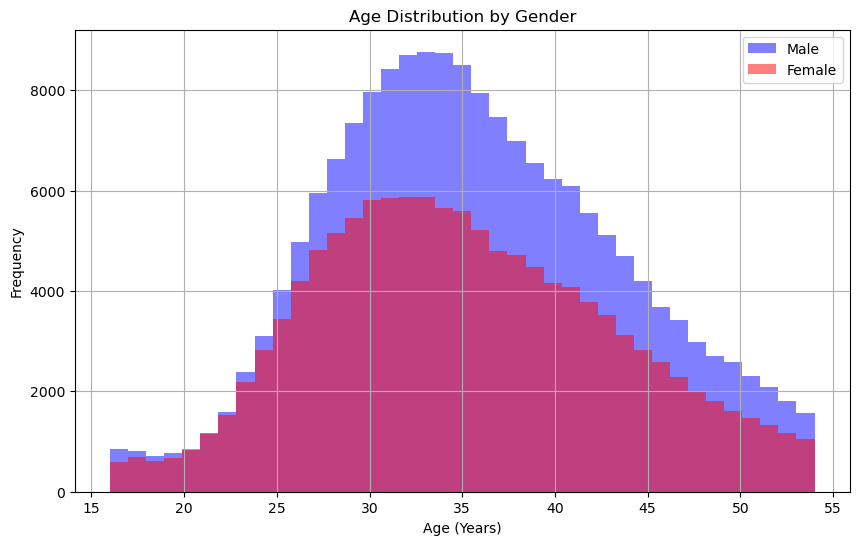

In [14]:
# Plotting histograms for Age comparing male and female
plt.figure(figsize=(10, 6))
plt.hist(CrossFit[CrossFit['Gender'] == 'M']['Age (Years)'], bins=39, alpha=0.5, label='Male', color='blue')
plt.hist(CrossFit[CrossFit['Gender'] == 'F']['Age (Years)'], bins=39, alpha=0.5, label='Female', color='red')
plt.title('Age Distribution by Gender')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

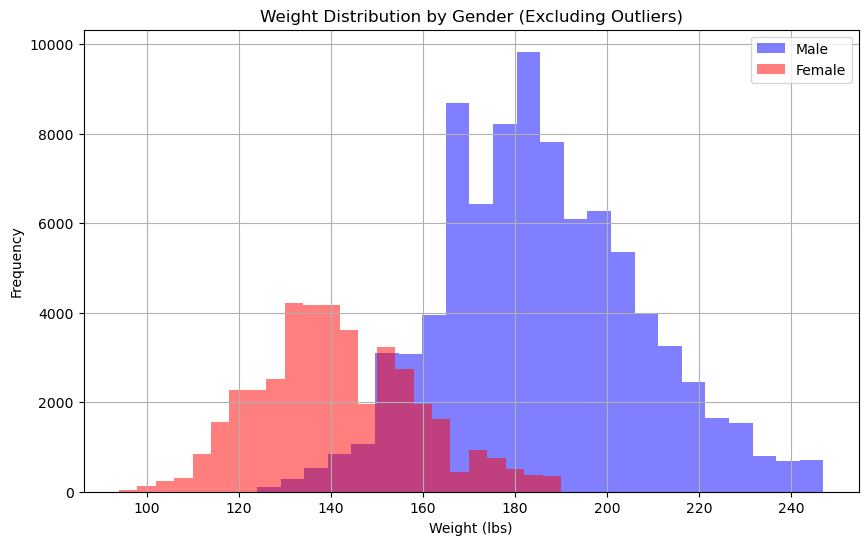

In [15]:
# Function to remove outliers based on interquartile range (IQR)
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers for male and female weight data
male_weight_no_outliers = remove_outliers_iqr(CrossFit[CrossFit['Gender'] == 'M']['Weight (lbs)'])
female_weight_no_outliers = remove_outliers_iqr(CrossFit[CrossFit['Gender'] == 'F']['Weight (lbs)'])

# Plotting histograms for Weight comparing male and female without outliers
plt.figure(figsize=(10, 6))
plt.hist(male_weight_no_outliers, bins=24, alpha=0.5, label='Male', color='blue')
plt.hist(female_weight_no_outliers, bins=24, alpha=0.5, label='Female', color='red')
plt.title('Weight Distribution by Gender (Excluding Outliers)')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

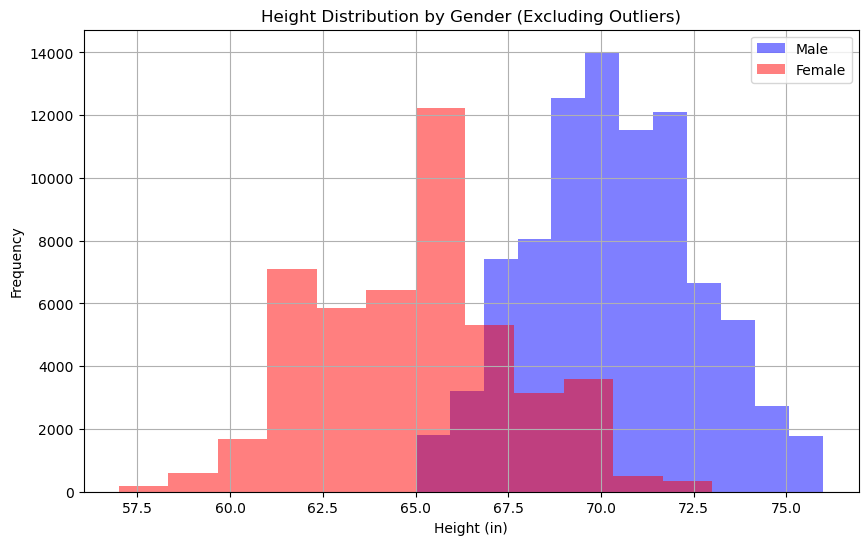

In [16]:
# Function to remove outliers based on interquartile range (IQR)
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Remove outliers for male and female height data
male_height_no_outliers = remove_outliers_iqr(CrossFit[CrossFit['Gender'] == 'M']['Height (in)'])
female_height_no_outliers = remove_outliers_iqr(CrossFit[CrossFit['Gender'] == 'F']['Height (in)'])

# Plotting histograms for Height comparing male and female without outliers
plt.figure(figsize=(10, 6))
plt.hist(male_height_no_outliers, bins=12, alpha=0.5, label='Male', color='blue')
plt.hist(female_height_no_outliers, bins=12, alpha=0.5, label='Female', color='red')
plt.title('Height Distribution by Gender (Excluding Outliers)')
plt.xlabel('Height (in)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

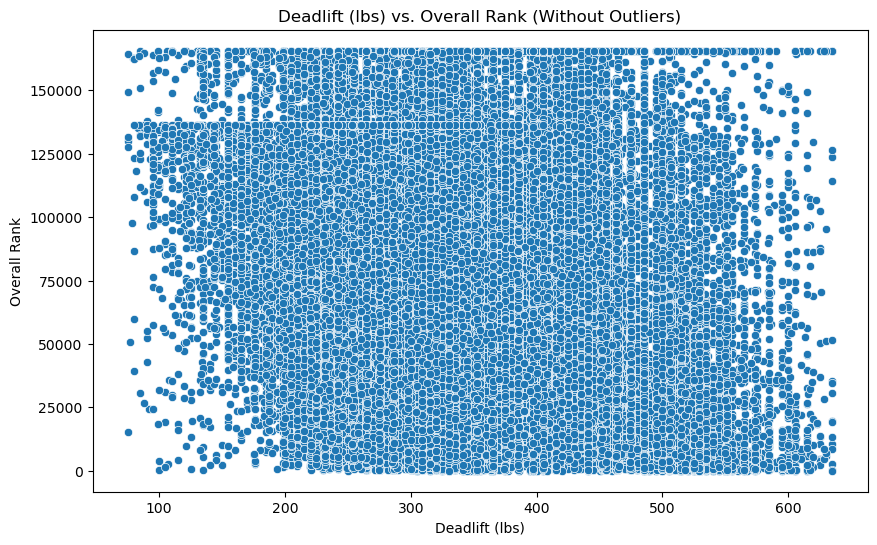

Correlation between Deadlift (lbs) and 'Overall Rank' after removing outliers: -0.18658666013819453


In [28]:
# Remove outliers from 'Deadlift (lbs)' column using IQR
Q1 = CrossFit['Deadlift (lbs)'].quantile(0.25)
Q3 = CrossFit['Deadlift (lbs)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
CrossFit_filtered = CrossFit[(CrossFit['Deadlift (lbs)'] >= lower_bound) & (CrossFit['Deadlift (lbs)'] <= upper_bound)]

# Visualize the relationship between 'Deadlift (lbs)' and 'Overall Rank' without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Deadlift (lbs)', y='Overall Rank', data=CrossFit_filtered)
plt.title('Deadlift (lbs) vs. Overall Rank (Without Outliers)')
plt.xlabel('Deadlift (lbs)')
plt.ylabel('Overall Rank')
plt.show()

# Calculate correlation coefficient between 'Deadlift (lbs)' and 'Overall Rank' after removing outliers
correlation = CrossFit_filtered['Deadlift (lbs)'].corr(CrossFit_filtered['Overall Rank'])
print("Correlation between Deadlift (lbs) and 'Overall Rank' after removing outliers:", correlation)

In [33]:
Crossfit_Men.columns

Index(['Athlete ID', 'Gender', 'Competitor Name', 'Country Name',
       'Region Name', 'Affiliate Name', 'Height (in)', 'Age (Years)',
       'Weight (lbs)', 'Overall Rank', '24.1 Rank', '24.2 Rank', '24.3 Rank',
       '2024 Rank', '2023 Rank', '2022 Rank', '2021 Rank', '2020 Rank',
       '2019 Rank', '2018 Rank', '2017 Rank', '2016 Rank', '2015 Rank',
       '2014 Rank', '2013 Rank', '2012 Rank', '2011 Rank', 'Back Squat (lbs)',
       'Deadlift (lbs)', 'Clean and Jerk (lbs)', 'Snatch (lbs)',
       'Fight Gone Bad (# reps)', 'Filthy 50 (time)', 'Filthy 50 (sec)',
       'Fran (time)', 'Fran (sec)', 'Grace (time)', 'Grace (sec)',
       'Helen (time)', 'Helen (sec)', 'L1 Benchmark (time)',
       'L1 Benchmark (sec)', 'Run 5k (time)', 'Run 5k (sec)',
       'Sprint 400m (time)', 'Sprint 400m (sec)'],
      dtype='object')

In [41]:
Crossfit_Men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176260 entries, 0 to 176259
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Athlete ID               176259 non-null  object 
 1   Gender                   176255 non-null  object 
 2   Competitor Name          176254 non-null  object 
 3   Country Name             175672 non-null  object 
 4   Region Name              176255 non-null  object 
 5   Affiliate Name           155236 non-null  object 
 6   Height (in)              89674 non-null   float64
 7   Age (Years)              176255 non-null  float64
 8   Weight (lbs)             89451 non-null   float64
 9   Overall Rank             176255 non-null  float64
 10  24.1 Rank                176255 non-null  float64
 11  24.2 Rank                176255 non-null  float64
 12  24.3 Rank                176255 non-null  float64
 13  2024 Rank                176257 non-null  float64
 14  2023

In [51]:
# Selecting features and target variable
X = Crossfit_Men.dropna(subset=['Overall Rank'])[[
                                                   'Back Squat (lbs)', 'Deadlift (lbs)', 
                                                   'Clean and Jerk (lbs)', 'Snatch (lbs)', 
                                                   'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                                                   'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 
                                                   'L1 Benchmark (sec)', 'Run 5k (sec)']]
y = Crossfit_Men.dropna(subset=['Overall Rank'])['Overall Rank']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initializing and training Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Predicting on test set
y_pred_rf = rf_model.predict(X_test_imputed)

# Evaluating model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)

Random Forest Mean Squared Error: 2172242284.787342


In [55]:
R^2 For the Whole Model 
r2 = r2_score(y_test, y_pred_rf)
print(r2)

0.15720072369067917


In [56]:
# Selecting features and target variable
selected_features = ['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 'Snatch (lbs)']
X_selected = Crossfit_Men.dropna(subset=['Overall Rank'])[selected_features]
y_selected = Crossfit_Men.dropna(subset=['Overall Rank'])['Overall Rank']

# Splitting data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train_sel)
X_train_sel_imputed = imputer.transform(X_train_sel)
X_test_sel_imputed = imputer.transform(X_test_sel)

# Initializing and training Random Forest model
rf_model_selected = RandomForestRegressor(random_state=42)
rf_model_selected.fit(X_train_sel_imputed, y_train_sel)

# Predicting on test set
y_pred_rf_selected = rf_model_selected.predict(X_test_sel_imputed)

# Calculating R² score
r2_selected = r2_score(y_test_sel, y_pred_rf_selected)
print("R² Score for the selected features:", r2_selected)

R² Score for the selected features: 0.12450929281351153


In [57]:
# Selecting features and target variable
selected_features = ['Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                                                   'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 
                                                   'L1 Benchmark (sec)']
X_selected = Crossfit_Men.dropna(subset=['Overall Rank'])[selected_features]
y_selected = Crossfit_Men.dropna(subset=['Overall Rank'])['Overall Rank']

# Splitting data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train_sel)
X_train_sel_imputed = imputer.transform(X_train_sel)
X_test_sel_imputed = imputer.transform(X_test_sel)

# Initializing and training Random Forest model
rf_model_selected = RandomForestRegressor(random_state=42)
rf_model_selected.fit(X_train_sel_imputed, y_train_sel)

# Predicting on test set
y_pred_rf_selected = rf_model_selected.predict(X_test_sel_imputed)

# Calculating R² score
r2_selected = r2_score(y_test_sel, y_pred_rf_selected)
print("R² Score for the selected features:", r2_selected)

R² Score for the selected features: 0.09446536033049624


In [58]:
# Selecting features and target variable
selected_features = ['Run 5k (sec)']
X_selected = Crossfit_Men.dropna(subset=['Overall Rank'])[selected_features]
y_selected = Crossfit_Men.dropna(subset=['Overall Rank'])['Overall Rank']

# Splitting data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train_sel)
X_train_sel_imputed = imputer.transform(X_train_sel)
X_test_sel_imputed = imputer.transform(X_test_sel)

# Initializing and training Random Forest model
rf_model_selected = RandomForestRegressor(random_state=42)
rf_model_selected.fit(X_train_sel_imputed, y_train_sel)

# Predicting on test set
y_pred_rf_selected = rf_model_selected.predict(X_test_sel_imputed)

# Calculating R² score
r2_selected = r2_score(y_test_sel, y_pred_rf_selected)
print("R² Score for the selected features:", r2_selected)

R² Score for the selected features: 0.03334856621309468


In [59]:
# Selecting features and target variable
selected_features = ['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 'Snatch (lbs)']
X_selected = Crossfit_Men.dropna(subset=['Overall Rank'])[selected_features]
y_selected = Crossfit_Men.dropna(subset=['Overall Rank'])['Overall Rank']

# Splitting data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train_sel)
X_train_sel_imputed = imputer.transform(X_train_sel)
X_test_sel_imputed = imputer.transform(X_test_sel)

# Initialize and train Linear Regression model
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_sel_imputed, y_train_sel)

# Predicting on test set
y_pred_lr_selected = lr_model_selected.predict(X_test_sel_imputed)

# Calculating R² score
r2_lr_selected = r2_score(y_test_sel, y_pred_lr_selected)
print("R² Score for the selected features using Linear Regression:", r2_lr_selected)

R² Score for the selected features using Linear Regression: 0.08047693109846421


In [62]:
# Selecting features and target variable
selected_features = ['Back Squat (lbs)', 'Deadlift (lbs)', 
                     'Clean and Jerk (lbs)', 'Snatch (lbs)', 
                     'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                     'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 
                     'L1 Benchmark (sec)', 'Run 5k (sec)']
X_selected = Crossfit_Men.dropna(subset=['Overall Rank'])[selected_features]
y_selected = Crossfit_Men.dropna(subset=['Overall Rank'])['Overall Rank']

# Splitting data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train_sel)
X_train_sel_imputed = imputer.transform(X_train_sel)
X_test_sel_imputed = imputer.transform(X_test_sel)

# Initialize and train Linear Regression model
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_sel_imputed, y_train_sel)

# Predicting on test set
y_pred_lr_selected = lr_model_selected.predict(X_test_sel_imputed)

# Calculating R² score
r2_lr_selected = r2_score(y_test_sel, y_pred_lr_selected)
print("R² Score for the selected features using Linear Regression:", r2_lr_selected)

R² Score for the selected features using Linear Regression: 0.09378721072204677


In [63]:
# Selecting features and target variable
selected_features = ['Run 5k (sec)']
X_selected = Crossfit_Men.dropna(subset=['Overall Rank'])[selected_features]
y_selected = Crossfit_Men.dropna(subset=['Overall Rank'])['Overall Rank']

# Splitting data into training and testing sets
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train_sel)
X_train_sel_imputed = imputer.transform(X_train_sel)
X_test_sel_imputed = imputer.transform(X_test_sel)

# Initialize and train Linear Regression model
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_sel_imputed, y_train_sel)

# Predicting on test set
y_pred_lr_selected = lr_model_selected.predict(X_test_sel_imputed)

# Calculating R² score
r2_lr_selected = r2_score(y_test_sel, y_pred_lr_selected)
print("R² Score for the selected features using Linear Regression:", r2_lr_selected)

R² Score for the selected features using Linear Regression: 0.016951619255684225


In [319]:
Crossfit_Men['Top 25%'] = Crossfit_Men['Overall Rank'].apply(lambda x: 1 if x < 41409 else 0)

In [320]:
Crossfit_Men.head()

,Athlete ID,Gender,Competitor Name,Country Name,Region Name,Affiliate Name,Height (in),Age (Years),Weight (lbs),Overall Rank,...,Helen (time),Helen (sec),L1 Benchmark (time),L1 Benchmark (sec),Run 5k (time),Run 5k (sec),Sprint 400m (time),Sprint 400m (sec),Top Rank,Top 25%
0,10942,M,Everett Sloan,Canada,North America East,CrossFit Bytown,67.0,45.0,200.0,68985.0,...,7:13,433.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,10926,M,Kevin Wood,Canada,North America East,CrossFit Moncton,75.0,43.0,196.0,35977.0,...,8:16,496.0,NaN,NaN,19:38,1178.0,1:00,60.0,0,1
2,10976,M,John Lazaro,United States,North America East,CrossFit Bridgewater,69.0,46.0,180.0,164180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,10977,M,Matthew Haynes,United States,North America West,CrossFit Westwood,71.0,31.0,180.0,165637.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,10966,M,Nick DiMatteo,United States,North America East,CrossFit OTG,68.0,48.0,165.0,60027.0,...,9:01,541.0,NaN,NaN,21:55,1315.0,NaN,NaN,0,0


In [351]:
# Extracting feature variables and target variable
X = Crossfit_Men[['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                  'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                  'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                  'Sprint 400m (sec)']]
y = Crossfit_Men['Top 25%']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

y_pred = logreg_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_model.coef_[0]
})
print("\nCoefficients:")
print(coefficients)

Accuracy: 0.8011176670827187

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.88     27079
           1       0.73      0.22      0.34      8173

    accuracy                           0.80     35252
   macro avg       0.77      0.60      0.61     35252
weighted avg       0.79      0.80      0.76     35252


Coefficients:
                    Feature  Coefficient
0          Back Squat (lbs)    -0.075589
1            Deadlift (lbs)     0.155830
2      Clean and Jerk (lbs)     0.365965
3              Snatch (lbs)     0.306352
4   Fight Gone Bad (# reps)    -0.016702
5           Filthy 50 (sec)    -0.005984
6                Fran (sec)    -0.414188
7               Grace (sec)     0.049666
8               Helen (sec)    -0.147084
9              Run 5k (sec)    -0.313566
10        Sprint 400m (sec)     0.013154


In [366]:
# Extracting feature variables and target variable
X = Crossfit_Men[['Clean and Jerk (lbs)', 'Snatch (lbs)']]
y = Crossfit_Men['Top 25%']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fitting a logistic regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg_model.fit(X_train_imputed, y_train)

# Predicting on the testing set
y_pred = logreg_model.predict(X_test_imputed)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optionally, you can also interpret the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_model.coef_[0]
})
print("\nCoefficients:")
print(coefficients)

Accuracy: 0.7938556677635311

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     27079
           1       0.71      0.19      0.30      8173

    accuracy                           0.79     35252
   macro avg       0.75      0.58      0.59     35252
weighted avg       0.78      0.79      0.74     35252


Coefficients:
                Feature  Coefficient
0  Clean and Jerk (lbs)     0.018491
1          Snatch (lbs)     0.017864


In [347]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Fitting a logistic regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# Predicting on the testing set
y_pred = logreg_model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optionally, you can also interpret the coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_model.coef_[0]
})
print("\nCoefficients:")
print(coefficients)

Accuracy: 0.7974583002382843

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     27079
           1       0.72      0.21      0.32      8173

    accuracy                           0.80     35252
   macro avg       0.76      0.59      0.60     35252
weighted avg       0.78      0.80      0.75     35252


Coefficients:
                Feature  Coefficient
0      Back Squat (lbs)    -0.065739
1          Run 5k (sec)    -0.389355
2        Deadlift (lbs)     0.155753
3  Clean and Jerk (lbs)     0.439175
4          Snatch (lbs)     0.389147


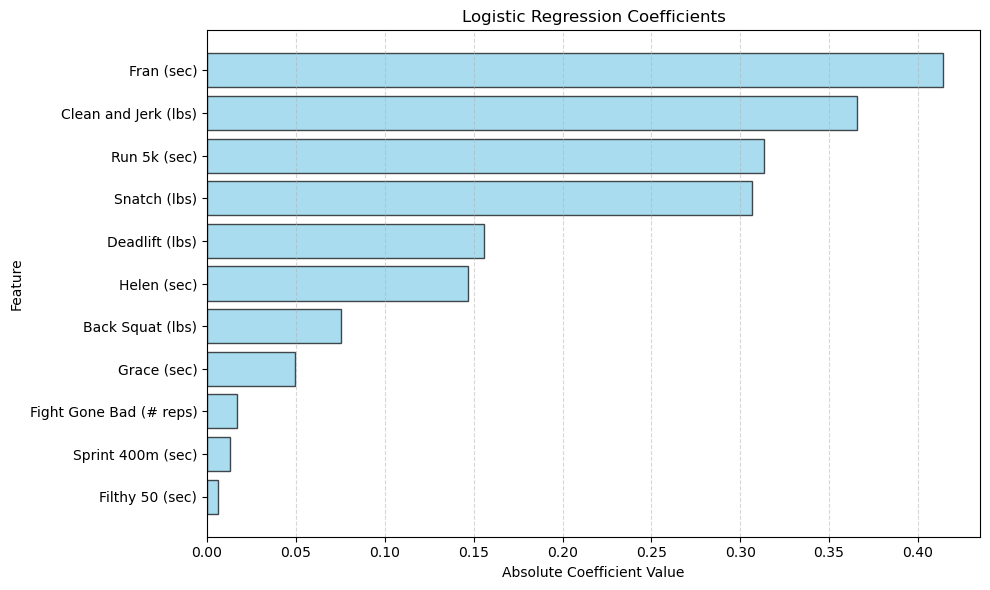

In [361]:
# Extract coefficients and features
coefficients = logreg_model.coef_[0]
features = X.columns

# Calculate absolute coefficients
abs_coefficients = np.abs(coefficients)

# Sort coefficients and features by absolute coefficient value
sorted_indices = np.argsort(abs_coefficients)[::-1]
sorted_coefficients = abs_coefficients[sorted_indices]
sorted_features = np.array(features)[sorted_indices]

# Plot coefficients
plt.figure(figsize=(10, 6))
bar_colors = ['skyblue' if c > 0 else 'lightcoral' for c in sorted_coefficients]  # Color bars based on coefficient sign
plt.barh(sorted_features, sorted_coefficients, color=bar_colors, edgecolor='black', alpha=0.7)
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

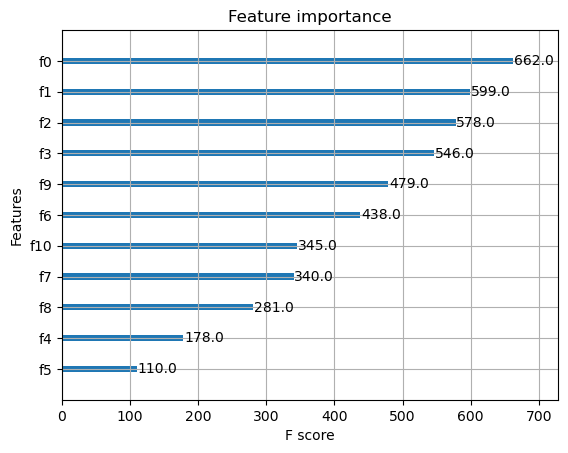

In [355]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train_imputed, y_train)

# Plot feature importance
plot_importance(xgb_model)
plt.show()

In [356]:
# Get feature importance scores
importance_scores = xgb_model.feature_importances_

# Create a dictionary to store feature names and their importance scores
feature_importance_dict = {}
for i in range(len(X.columns)):
    feature_importance_dict[X.columns[i]] = importance_scores[i]

# Sort the dictionary by importance scores in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print out the top 10 features with their importance scores
print("Feature Importance:")
for i in range(11):
    feature_name, importance_score = sorted_feature_importance[i]
    print(f"{feature_name}: {importance_score}")

Feature Importance:
Snatch (lbs): 0.41021108627319336
Fran (sec): 0.15919844806194305
Clean and Jerk (lbs): 0.10799155384302139
Run 5k (sec): 0.06330379098653793
Helen (sec): 0.051490191370248795
Deadlift (lbs): 0.04485654830932617
Filthy 50 (sec): 0.03984769433736801
Fight Gone Bad (# reps): 0.03903307393193245
Back Squat (lbs): 0.033665731549263
Sprint 400m (sec): 0.02542957291007042
Grace (sec): 0.02497226744890213


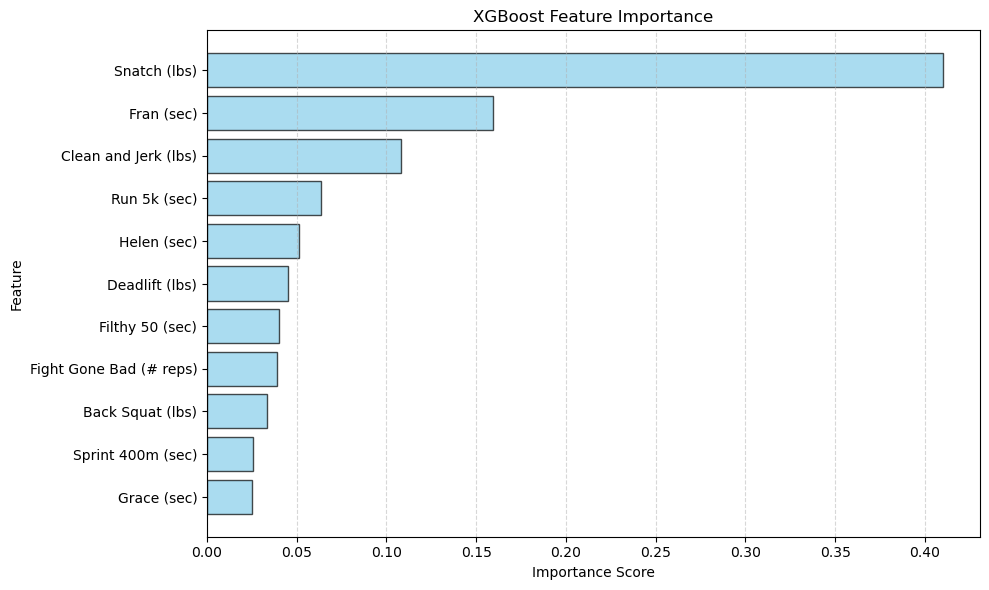

In [ ]:
# Extract top 11 features and their importance scores
top_features = [item[0] for item in sorted_feature_importance[:11]]
top_scores = [item[1] for item in sorted_feature_importance[:11]]

# Create a color palette
colors = sns.color_palette("coolwarm", len(top_features))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_scores, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [333]:
# Replace these values with your own performance scores
my_scores = {
    'Back Squat (lbs)': 300,
    'Deadlift (lbs)': 800,
    'Clean and Jerk (lbs)': 250,
    'Snatch (lbs)': 200,
    'Fight Gone Bad (# reps)': 350,
    'Filthy 50 (sec)': 2500,
    'Fran (sec)': 180,
    'Grace (sec)': 90,
    'Helen (sec)': 420,
    'Run 5k (sec)': 1200,
    'Sprint 400m (sec)': 60
}

# Convert the dictionary into a DataFrame with a single row
my_scores_df = pd.DataFrame([my_scores])

# Impute missing values in the input features if necessary
my_scores_imputed = imputer.transform(my_scores_df)

# Predicting the target variable using the trained logistic regression model
predicted_y = logreg_model.predict(my_scores_imputed)

# Displaying the predicted target variable
print("Predicted Target Variable (Top 25%):", predicted_y)

Predicted Target Variable (Top 25%): [1]


In [338]:
# Extracting feature variables and target variable
X = Crossfit_Men[['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                  'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                  'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                  'Sprint 400m (sec)']]
y = Crossfit_Men['Top 25%']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fitting a logistic regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg_model.fit(X_train_imputed, y_train)

# Save the trained model to a file
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)

# Now you can proceed to create the interactive app using the code provided in the previous response.

In [334]:
# Predicting the probability of being in the top 25% category
predicted_proba = logreg_model.predict_proba(my_scores_imputed)

# The predicted_proba array will contain two columns:
# Column 0: Probability of not being in the top 25% category
# Column 1: Probability of being in the top 25% category

# Extracting the probability of being in the top 25% category
probability_top_25 = predicted_proba[0][1]

# Displaying the probability
print("Probability of being in the top 25% category:", probability_top_25)

Probability of being in the top 25% category: 0.9535439912704585


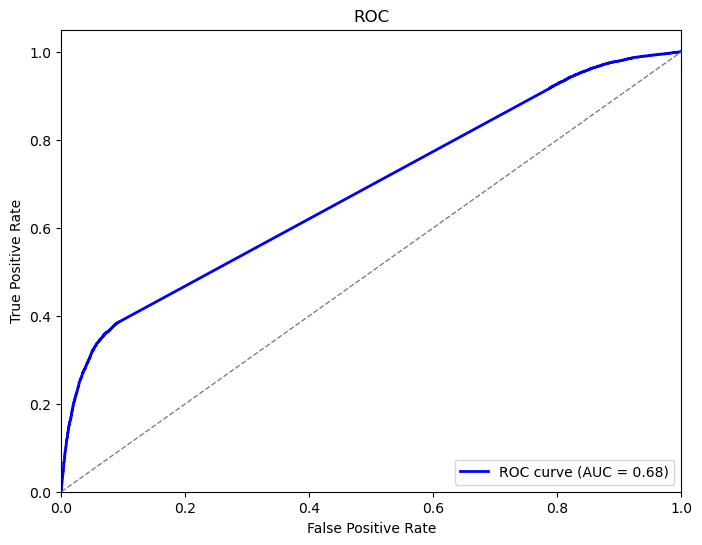

In [327]:
# Extracting feature variables and target variable
X = Crossfit_Men[['Back Squat (lbs)', 'Deadlift (lbs)', 'Clean and Jerk (lbs)', 
                  'Snatch (lbs)', 'Fight Gone Bad (# reps)', 'Filthy 50 (sec)', 
                  'Fran (sec)', 'Grace (sec)', 'Helen (sec)', 'Run 5k (sec)', 
                  'Sprint 400m (sec)']]
y = Crossfit_Men['Top 25%']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each feature
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fitting a logistic regression model
logreg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
logreg_model.fit(X_train_imputed, y_train)

# Predicting probabilities on the testing set
y_pred_proba = logreg_model.predict_proba(X_test_imputed)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [330]:
# Fitting a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Predicting on the testing set
y_pred_rf = rf_model.predict(X_test_imputed)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.802706229433791

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     27079
           1       0.67      0.30      0.41      8173

    accuracy                           0.80     35252
   macro avg       0.74      0.63      0.65     35252
weighted avg       0.78      0.80      0.77     35252



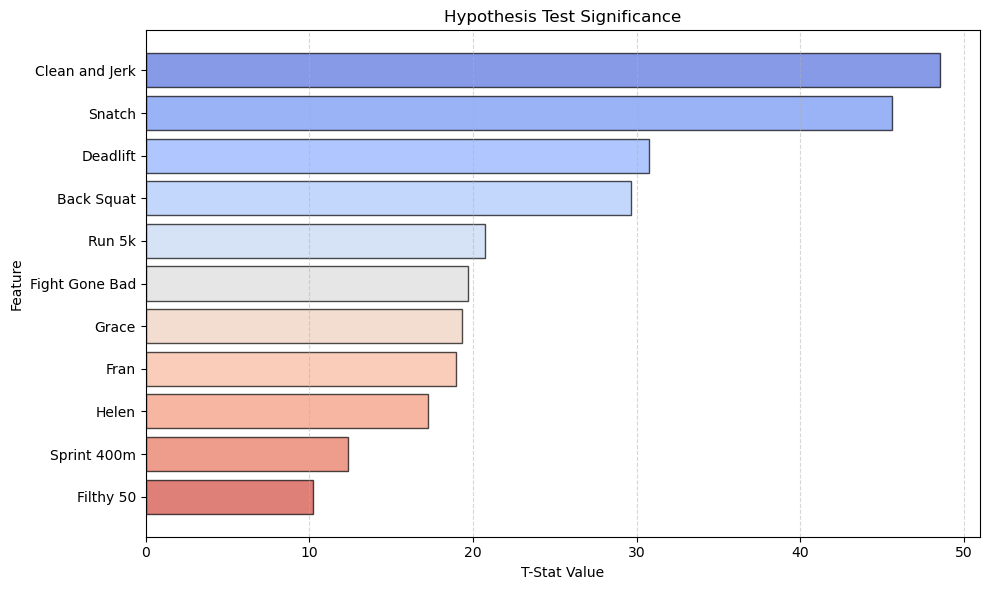

In [370]:
# Example t-stat values and corresponding features
t_stat_values = [48.55, 45.6, 19.7, 29.67, 30.74, 10.22, 12.39, 19.32, 17.26, 20.75, 18.94]
features = ['Clean and Jerk', 'Snatch', 'Fight Gone Bad', 'Back Squat', 'Deadlift', 'Filthy 50', 'Sprint 400m', 'Grace', 'Helen', 'Run 5k', 'Fran']
# Sort features and t-stat values by absolute t-statistic value
sorted_indices = sorted(range(len(t_stat_values)), key=lambda i: abs(t_stat_values[i]), reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_t_stat_values = [t_stat_values[i] for i in sorted_indices]

# Create a color palette
colors = sns.color_palette("coolwarm", len(t_stat_values))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_t_stat_values, color=colors, edgecolor='black', alpha=0.7)
plt.xlabel('T-Stat Value')
plt.ylabel('Feature')
plt.title('Hypothesis Test Significance')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.5)  # Add vertical line at zero for reference
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Add gridlines for better readability
plt.gca().invert_yaxis()  # Invert y-axis to show features with higher values on top
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
plt.show()